In [1]:
import requests
import json

# Fetch the list of earthquakes from the provided URL
quakes = requests.get("http://earthquake.usgs.gov/fdsnws/event/1/query.geojson",
                      params={
                          'starttime': "2000-01-01",
                          "maxlatitude": "58.723",
                          "minlatitude": "50.008",
                          "maxlongitude": "1.67",
                          "minlongitude": "-9.756",
                          "minmagnitude": "1",
                          "endtime": "2018-10-11",
                          "orderby": "time-asc"}
                      )

# Convert the quakes resonse to json
quakes = json.loads(quakes.text)

# Save the quakes to file so that we can look at the structure
# tempfile = 'temp.json'
# with open(tempfile, 'w') as outfile:
#     json.dump(quakes, outfile)

# Parse the quakes to give a list of the information that we care about
parsed_quakes = [{
    'title': feature['properties']['title'],
    'mag': feature['properties']['mag'],
    'long': feature['geometry']['coordinates'][0],
    'lat': feature['geometry']['coordinates'][1]
} for feature in quakes['features'] if feature['properties']['type'] == 'earthquake']

# Check the parsed quakes all look correct
for quake in parsed_quakes:
    print(quake)

{'title': 'M 2.6 - England, United Kingdom', 'mag': 2.6, 'long': -2.81, 'lat': 54.77}
{'title': 'M 4.0 - England, United Kingdom', 'mag': 4, 'long': -1.61, 'lat': 52.28}
{'title': 'M 4.0 - North Sea', 'mag': 4, 'long': 1.564, 'lat': 53.236}
{'title': 'M 3.3 - North Sea', 'mag': 3.3, 'long': 0.872, 'lat': 58.097}
{'title': 'M 2.9 - England, United Kingdom', 'mag': 2.9, 'long': -1.845, 'lat': 51.432}
{'title': 'M 2.9 - Scotland, United Kingdom', 'mag': 2.9, 'long': -3.639, 'lat': 55.102}
{'title': 'M 4.0 - England, United Kingdom', 'mag': 4, 'long': -4.684, 'lat': 50.995}
{'title': 'M 2.6 - England, United Kingdom', 'mag': 2.6, 'long': 1.144, 'lat': 51.76}
{'title': 'M 2.6 - England, United Kingdom', 'mag': 2.6, 'long': 1.094, 'lat': 51.332}
{'title': 'M 3.5 - Wales-England region, United Kingdom', 'mag': 3.5, 'long': -3.205, 'lat': 51.552}
{'title': 'M 2.5 - Wales-England region, United Kingdom', 'mag': 2.5, 'long': -3.25, 'lat': 51.7}
{'title': 'M 4.2 - England, United Kingdom', 'mag':

In [2]:
# Sort the parsed quakes based on  magnitude in ascending order
sorted_quakes = sorted(parsed_quakes, key=lambda x: x['mag'])

In [3]:
# Get the biggest magnitude earthquake
big_bad_quake = sorted_quakes[-1]
print('The biggest quake - {}'.format(big_bad_quake))

The biggest quake - {'title': 'M 4.8 - England, United Kingdom', 'mag': 4.8, 'long': -0.332, 'lat': 53.403}


In [4]:
# Define a function that returns a satellite image given latitude and longitude
def request_map_at(lat, long, satellite=True, zoom=10, size=(400, 400)):
    base = "https://static-maps.yandex.ru/1.x/?"
    params = dict(
        z = zoom,
        size = str(size[0]) + "," + str(size[1]),
        ll = str(long) + "," + str(lat),
        l = "sat" if satellite else "map",
        lang = "en_US"
    )

    return requests.get(base,params=params).content

# Call the function for our example quake
map_bytes = request_map_at(big_bad_quake['lat'],big_bad_quake['long'])

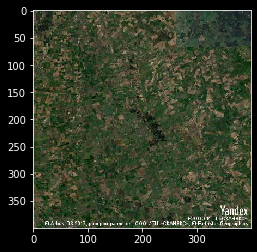

In [5]:
import matplotlib.pyplot as plt
import imageio

# Convert the image from bytes to an image and display it
im = imageio.imread(map_bytes)
plt.imshow(im)